<a href="https://colab.research.google.com/github/doxenix/WUM/blob/main/s24216_WUM_img_hw_2022_q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praca domowa - obraz


Najpierw upewnijmy się, że pracujemy na GPU. 

* Włącz GPU (Runtime / Change runtime type)

## MNIST



### Wczytanie i wizualizacja

* Wczytaj dane mnist do zmiennych X_train, y_train, X_test, y_test.
https://keras.io/datasets/

In [ ]:
from keras.datasets import mnist
import numpy as np

(X_train, y_train), (X_test, y_test) = mnist.load_data()

Teraz sprawdź i napisz:
* ile mamy instancji treningowych:
* ile mamy instancji testowych:
* jakie są wymiary w pixelach jednego obrazka:
* ile kanałów ma jeden obrazek:
* ile bajtów zajmuje jeden piksel:
* jaka jest minimalna i maksymalna wartość piksela:



In [ ]:
print(f'Liczba instancji treningowych: {X_train.shape[0]}')
print(f'Liczba instancji testowych: {X_test.shape[0]}')
print(f'Wymiary w pixelach jednego obrazka: {X_train[0].shape}')
print(f'L. kanalow 1 obrazka: {len(X_train[0].shape)}')
print(f'Ile bajtów zajmuje jeden piksel: {type(X_train[0][0][0])}')
print(f'Maks wartość pixela: {X_train[0].max()}. Min wartosc piksela: {X_train[0].min()}')

Liczba instancji treningowych: 60000
Liczba instancji testowych: 10000
Wymiary w pixelach jednego obrazka: (28, 28)
L. kanalow 1 obrazka: 2
Ile bajtów zajmuje jeden piksel: <class 'numpy.uint8'>
Maks wartość pixela: 255. Min wartosc piksela: 0


Świetnie, teraz: 
* Wyrysuj pierwsze 12 elementów zbioru treningowego.
* Wypisz lub narysuj etykiety tych 12 elementów. 

[Tutaj są różne color mapy.](  
https://matplotlib.org/examples/color/colormaps_reference.html), których możesz użyć w funkcji imshow.  

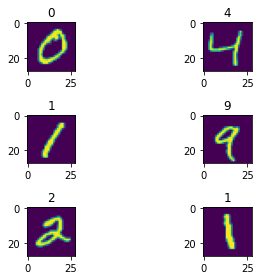

In [ ]:
import matplotlib.pyplot as plt

for i in range(1, 7):
  plt.subplot(3, 2, i)   
  plt.imshow(X_train[i])
  plt.title(y_train[i])
plt.tight_layout()  
plt.show()

* Teraz narysuj swój numer studenta używając cyfr zbioru mnist. Jeśli Twój indeks to np. s12345, wyrysuj 5 obrazków z cyframi '1', '2', '3', '4' i '5' obok siebie. 

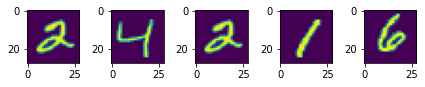

In [ ]:
index_nums = [2, 4, 2, 1, 6]

for i, num in enumerate(index_nums):
  plt.subplot(1, 5, i+1)
  array_index = np.where(y_train==num)[0][0]   
  plt.imshow(X_train[array_index])  
plt.tight_layout()  
plt.show()

### Klasyfikacja CNN'em

####Przygotowanie danych

Przygotujmy nasze dane treningowe:
* Przerób X_train i X_test tak, żeby wartości wszystkich pixeli były zawarte w przedziale <0,1>
* Zmień typ naszych pixeli na 'float32'

*Może się przydać metoda astype.*

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

scaler = MinMaxScaler()
# # transform data
X_train = scaler.fit_transform(X_train.reshape(X_train.shape[0],-1))
X_test = scaler.fit_transform(X_test.reshape(X_test.shape[0],-1))

X_train = X_train.reshape(X_train.shape[0],28,28)
X_test = X_test.reshape(X_test.shape[0],28,28)

Przygotowaliśmy dane treningowe, teraz jeszcze etykiety.  W tej chwili jest to wektor liczb - dla każdej instancji mamy jedną liczbę. Nasza sieć będzie miała na wyjściu 10 wartości (wynik dla każdej klasy), więc musimy przerobić nasze liczby do postaci one-hot. Jeśli klasy trzech instancji to np. [0, 3, 5], w postaci one-hot będziemy mieć na przykład coś takiego:  
[1000000000]  
[0001000000]  
[0000010000]

Możesz do tego użyć funkcji [to_categorical](https://keras.io/api/utils/python_utils/).

* Przekonwertuj etykiety do postaci one-hot i wpisz wyniki do zmiennych Y_train i Y_test. 
* Wypisz 10 pierwszych elementów Y_train oraz y_train. 
* Napisz, jak w nowej postaci będą zapisane etykiety cyfr: 1, 2 i 4. 
* Wypisz kolejne cyfry swojego numeru indeksu używając powyższego zapisu. 

In [ ]:
from keras.utils.np_utils import to_categorical 

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

print(Y_train[:10])
print(y_train[:10])
print('\n')
nums = [1,2,4]

for i, num in enumerate(nums):
  
  array_index = np.where(y_train==num)[0][0] 
  print(f'Liczba {num}:')
  print(Y_train[array_index])

print('\n')
print('Moj indeks s:')
for i, num in enumerate(index_nums):
  
  array_index = np.where(y_train==num)[0][0] 
  print(f'Liczba {num}:')
  print(Y_train[array_index])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[5 0 4 1 9 2 1 3 1 4]


Liczba 1:
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Liczba 2:
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Liczba 4:
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


Moj indeks s:
Liczba 2:
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Liczba 4:
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Liczba 2:
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Liczba 1:
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Liczba 6:
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


Pierwsze warstwy naszej sieci będą typu Conv2D. Przyjmują one dane instancji w postaci wielowymiarowych tablic. Nie spłaszczamy zatem danych do postaci wektora - jak musielibyśmy zrobić w przypatku SVM lub MLP. Zrobi to dopiero potem warstwa Flatten naszej sieci.  

Przekazujemy sieci instancje w postaci szerokość x wysokość x liczba_kanałów (format 'channels_last', w przypdku formatu 'channels_first' tablica miałaby wymiary liczba_kanałów x szerokość x wysokość).

* upewnij się, że działamy w trybie channels_last (keras.backend.image_data_format())
* sprawdź jeszcze raz shape danych treningowych i testowych
* jeśli brakuje nam ostatniego wymiaru, dodajmy go

*np.expand_dims(X_train, -1) powinien nam dodać brakujący wymiar na końcu; opcjonalnie można użyć kodu z ćwiczeń*

 

In [ ]:
import tensorflow as tf

from keras import backend as K

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

#### Przygotowanie sieci

Prawdopodobnie przydadzą nam się poniższe importy. 
```python
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
```

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

* Zbuduj sieć z takimi warstwami:
 * Na wejściu [Conv2D](https://keras.io/api/layers/convolution_layers/convolution2d/): 16 filtrów, kernel 3x3, padding 'same', activation [relu](https://cs-cheatsheet.readthedocs.io/en/latest/_images/activation_functions.png)
 * [MaxPooling2D](https://keras.io/api/layers/pooling_layers/max_pooling2d/): pool_size 2x2
 * Conv2D: 32 filtry, kernel 3x3, padding 'same', activation relu
 * MaxPooling2D: pool_size 2x2
 * [Flatten](https://keras.io/api/layers/reshaping_layers/flatten/) (spłaszczamy dane do 1-wymiarowego wektora)
 * Na wyjściu [Dense](https://keras.io/api/layers/core_layers/dense/), units tyle, co klas, [aktywacja softmax](https://qph.fs.quoracdn.net/main-qimg-fda2f008df90ed5d7b6aff89b881e1ac)

Pierwsza warstwa będzie oczekiwać podania kształtu danych (input_shape). Czyli szerokość x wysokość x liczba kanałów. 

In [ ]:
model = Sequential([
  Conv2D(16, kernel_size=(3,3), padding='same',activation='relu', input_shape = (28, 28, 1)),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(32, kernel_size=(3,3), padding='same',activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Flatten(),  
  Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 10)                1

* Sprawdź, jak wygląda Twoja sieć  
Przyda się metoda model.summary i ewentualnie funkcja keras.utils.vis_utils.plot_model

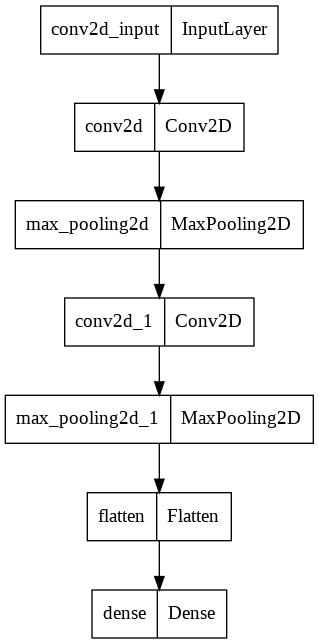

In [ ]:
tf.keras.utils.plot_model(model)

* Spróbuj usunąć argument padding i napisz, co się zmieniło. 
* Przywróć padding. 

In [ ]:
'''
Po usunieciu arg padding, zmienia sie wymiar daneych wchodzacych do warstw sieci. 
W przypadku pierwszych 3 warstw, szerkosc i wysokosc zmiejsza sie o 2, 1 i 3 jednostki.
Skutkiem tego jest dosc duze zmijeszenie wymiaru danych dla Warstwy Flatten 
'''

'\nPo usunieciu arg padding, zmienia sie wymiar daneych wchodzacych do warstw sieci. \nW przypadku pierwszych 3 warstw, szerkosc i wysokosc zmiejsza sie o 2, 1 i 3 jednostki.\nSkutkiem tego jest dosc duze zmijeszenie wymiaru danych dla Warstwy Flatten \n'

Odpowiedz na poniższe pytania: 
* Czy warstwa Conv2D się uczy w trakcie treningu?: 
* Czy warstwa MaxPooling2D się uczy w trakcie treningu?:
* Dlaczego przed warstwą / warstwami Dense umieszczamy warstwę Flatten?:
* Ile będziemy mieć kanałów / map aktywacji po przepuszczeniu obrazka przez pierwszą warstwę Conv2D naszej sieci?:


In [ ]:
'''
1. Warstwa Conv2D otrzymuje w parametrze funkcje aktywacji do wyboru, dodatkowo zwraca array z wagami w zaleznosci od parametrow a wagi sa aktualziowane przy kazdym przechodzeniu przez siec.
2. MaxPooling2D odpowiada za zmnijeszanie danego obrazka w celu wychwycenia maksymalnych wartosci pixeli w danym obszarze. Pomoga to w uczeniu i ogranicza ryzyko przeuczenia modelu. Jest to warstwa ktora odpowiada za filtracje
  obrazka otrzymanego z wejscia i zwraca pomniejszona wersje na wyjsciu. (W naszym wypadku zmiejszamy wymiar raz 2 za kazdym razem).
3. Poniewaz warstwa Dense potrzebuje danych o jednym wymiarze, dlatego nasze dane ktore wczesnie sa wielowymairowe musza ulec splaszczeniu.
4. Po przepuszczeniu obrazka przez pierwsza warstwe Conv2D dostaniemy 16 kanalow na wyjsciu.
'''

In [ ]:
import tensorflow as tf
x = tf.constant([[1., 2., 3.],
                  [4., 5., 6.],
                 [7., 8., 9.]])
x = tf.reshape(x, [1, 3, 3, 1])
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
strides=(1, 1), padding='valid')
print(max_pool_2d(x))
print(x)

tf.Tensor(
[[[[5.]
   [6.]]

  [[8.]
   [9.]]]], shape=(1, 2, 2, 1), dtype=float32)
tf.Tensor(
[[[[1.]
   [2.]
   [3.]]

  [[4.]
   [5.]
   [6.]]

  [[7.]
   [8.]
   [9.]]]], shape=(1, 3, 3, 1), dtype=float32)


Teraz:
* Uruchom metodę compile: loss 'categorical_crossentropy', optimizer 'adam'. Argument metrics przyjmuje tablicę stringów, możemy tam np. śledzić 'accuracy'. 

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [ ]:
X_train.shape

(60000, 28, 28, 1)

#### Trening
* Wytrenuj sieć. 100 epok, batch_size 256.

In [ ]:
model.fit(X_train, Y_train, batch_size=256, epochs=100)

Epoch 1/100
235/235 [==============================] - 7s 9ms/step - loss: 0.4773 - accuracy: 0.8653
Epoch 2/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1221 - accuracy: 0.9640
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0840 - accuracy: 0.9742
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0665 - accuracy: 0.9807
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0579 - accuracy: 0.9825
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0525 - accuracy: 0.9840
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0471 - accuracy: 0.9859
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0432 - accuracy: 0.9869
Epoch 9/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0401 - accuracy: 0.9879
Epoch 10/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0369 - accura

#### Ewaluacja
* Zrób ewaluację naszego modelu na zbiorze treningowym i testowym (metoda evaluate). 
* Podaj wyniki dla obu zbiorów: 
* Czy wyniki się różnią? Dlaczego? 

In [ ]:
model.evaluate(X_train, Y_train)
model.evaluate(X_test, Y_test)

'''
Accuracy na zbiorze trenigowym dalej wynosi 1.0, natomiast w zbiorze testowym wynosi niecale 99%.
Model uczyl sie na danych trenigowych, ktore widzial duzo razy i dobrze sie na nich nauczyl (mogl juz sie nawet nieco przetrenowac)
W przypadku danych testowych, wynik jest gorsz poniewaz te dane  widzial pierwszy raz. Mimo to, wyniki na danych testowych i tak jest dobry.
'''

313/313 [==============================] - 1s 3ms/step - loss: 0.0687 - accuracy: 0.9891


'\nAccuracy na zbiorze trenigowym dalej wynosi 1.0, natomiast w zbiorze testowym wynosi niecale 99%.\nModel uczyl sie na danych trenigowych, ktore widzial duzo razy i dobrze sie na nich nauczyl (mogl juz sie nawet nieco przetrenowac)\nW przypadku danych testowych, wynik jest gorsz poniewaz te dane  widzial pierwszy raz. Mimo to, wyniki na danych testowych i tak jest dobry.\n'

## FASHION MNIST 
Teraz powtórzymy eksperyment na innym, ale bardzo podobnym zbiorze danych. 

### Wczytanie i przygotowanie danych
* Wczytaj zbiór fashion_mnist analogicznie do mnist'a
* Przygotuj dane treningowe/testowe oraz etykiety analogicznie do mnista'a

In [ ]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

* Wyświetl 12 pierwszych instancji treningowych

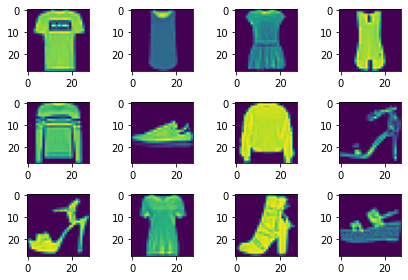

In [ ]:
for i in range(1, 13):
  plt.subplot(3, 4, i)   
  plt.imshow(X_train[i])  
plt.tight_layout()  
plt.show()

* Przygotuj dane i etykiety do treningu (tak samo jak w mnist)

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

scaler = MinMaxScaler()
# # transform data
X_train = scaler.fit_transform(X_train.reshape(X_train.shape[0],-1))
X_test = scaler.fit_transform(X_test.reshape(X_test.shape[0],-1))

X_train = X_train.reshape(X_train.shape[0],28,28)
X_test = X_test.reshape(X_test.shape[0],28,28)

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

### Przygotowanie sieci i trening

* Stwórz identyczną sieć jak przy mnist i przeprowadź trening. 

In [ ]:
model1 = Sequential([
  Conv2D(16, kernel_size=(3,3), padding='same',activation='relu', input_shape = (28, 28, 1)),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(32, kernel_size=(3,3), padding='same',activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Flatten(),  
  Dense(10, activation='softmax')
])

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')
model1.fit(X_train, Y_train, batch_size=256, epochs=100)

Epoch 1/100
235/235 [==============================] - 2s 5ms/step - loss: 0.7094 - accuracy: 0.7545
Epoch 2/100
235/235 [==============================] - 1s 5ms/step - loss: 0.4241 - accuracy: 0.8499
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3772 - accuracy: 0.8660
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3505 - accuracy: 0.8768
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3328 - accuracy: 0.8819
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3167 - accuracy: 0.8878
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3038 - accuracy: 0.8924
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2962 - accuracy: 0.8943
Epoch 9/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2884 - accuracy: 0.8975
Epoch 10/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2796 - accura

### Ewaluacja
* Zrób ewaluację naszego modelu na zbiorze treningowym i testowym (metoda evaluate).
* Podaj wyniki dla obu zbiorów:

In [ ]:
model1.evaluate(X_train, Y_train)
model1.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3457 - accuracy: 0.9076


[0.34570789337158203, 0.9075999855995178]

### Early stopping
* Dodajmy do treningu zbiór walidacyjny - możesz do tego użyć argumentu 'validation_split' metody [fit](https://keras.io/api/models/model_training_apis/). Zróbmy 10%. 
* Dodaj [early stopping](https://keras.io/api/callbacks/early_stopping/), patience 5. 
* Przeprowadź dwa treningi - najpierw monitorując w early stopping 'loss' a potem 'val_loss'. Jaka jest różnica? 

Jeśli early stopping nie miał okazji zadziałać, zwiększ liczbę epok. 

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
model2 = Sequential([
  Conv2D(16, kernel_size=(3,3), padding='same',activation='relu', input_shape = (28, 28, 1)),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(32, kernel_size=(3,3), padding='same',activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Flatten(),  
  Dense(10, activation='softmax')
])

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')


model2.fit(X_train, Y_train, batch_size=256, epochs=100, validation_split=0.1, callbacks=[callback])

Epoch 1/100
211/211 [==============================] - 2s 7ms/step - loss: 0.7239 - accuracy: 0.7471 - val_loss: 0.4621 - val_accuracy: 0.8335
Epoch 2/100
211/211 [==============================] - 1s 6ms/step - loss: 0.4269 - accuracy: 0.8489 - val_loss: 0.4280 - val_accuracy: 0.8442
Epoch 3/100
211/211 [==============================] - 1s 6ms/step - loss: 0.3810 - accuracy: 0.8653 - val_loss: 0.3709 - val_accuracy: 0.8697
Epoch 4/100
211/211 [==============================] - 1s 6ms/step - loss: 0.3571 - accuracy: 0.8744 - val_loss: 0.3470 - val_accuracy: 0.8768
Epoch 5/100
211/211 [==============================] - 1s 6ms/step - loss: 0.3401 - accuracy: 0.8807 - val_loss: 0.3342 - val_accuracy: 0.8828
Epoch 6/100
211/211 [==============================] - 1s 6ms/step - loss: 0.3241 - accuracy: 0.8861 - val_loss: 0.3173 - val_accuracy: 0.8867
Epoch 7/100
211/211 [==============================] - 1s 6ms/step - loss: 0.3121 - accuracy: 0.8909 - val_loss: 0.3133 - val_accuracy: 0.8877

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)


model3 = Sequential([
  Conv2D(16, kernel_size=(3,3), padding='same',activation='relu', input_shape = (28, 28, 1)),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(32, kernel_size=(3,3), padding='same',activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Flatten(),  
  Dense(10, activation='softmax')
])

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

model3.fit(X_train, Y_train, batch_size=256, epochs=100, validation_split=0.1, callbacks=[callback])

Epoch 1/100
211/211 [==============================] - 2s 6ms/step - loss: 0.7671 - accuracy: 0.7437 - val_loss: 0.4644 - val_accuracy: 0.8332
Epoch 2/100
211/211 [==============================] - 1s 6ms/step - loss: 0.4343 - accuracy: 0.8447 - val_loss: 0.4006 - val_accuracy: 0.8575
Epoch 3/100
211/211 [==============================] - 1s 6ms/step - loss: 0.3825 - accuracy: 0.8649 - val_loss: 0.3665 - val_accuracy: 0.8665
Epoch 4/100
211/211 [==============================] - 1s 6ms/step - loss: 0.3500 - accuracy: 0.8775 - val_loss: 0.3518 - val_accuracy: 0.8772
Epoch 5/100
211/211 [==============================] - 1s 6ms/step - loss: 0.3341 - accuracy: 0.8818 - val_loss: 0.3375 - val_accuracy: 0.8803
Epoch 6/100
211/211 [==============================] - 1s 6ms/step - loss: 0.3139 - accuracy: 0.8899 - val_loss: 0.3247 - val_accuracy: 0.8828
Epoch 7/100
211/211 [==============================] - 1s 6ms/step - loss: 0.2994 - accuracy: 0.8945 - val_loss: 0.3136 - val_accuracy: 0.8882

### Poprawa wyniku
* Spróbuj stworzyć 3 sieci, które uzyskają lepszy wynik na zbiorze fashion_mnist. Możesz zmodyfikować naszą prostą sieć lub zaprojektować zupełnie nową. 
* Poeksperymentuj z modyfikacjami warstw Conv2D (np. zmiana liczby filtrów), dodawaniem warstw Conv2D i Dense. Możesz też dodać Dropout. 
* Dla każdej z tych sieci przeprowadź ewaluację i wypisz wyniki. 

In [ ]:
from keras.layers import Dropout

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)


model5 = Sequential([
  Conv2D(64, kernel_size=(3,3), padding='same',activation='relu', input_shape = (28, 28, 1)),
  Dropout(0.2),
  MaxPooling2D(pool_size=(2,2)),
  Dropout(0.2),
  Conv2D(32, kernel_size=(3,3), padding='same',activation='relu'),
  Dropout(0.2),
  MaxPooling2D(pool_size=(2,2)),
  Dropout(0.2),
  Flatten(),  
  Dense(10, activation='softmax')
])

model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

model5.fit(X_train, Y_train, batch_size=256, epochs=100, validation_split=0.1, callbacks=[callback])

Epoch 1/100
211/211 [==============================] - 4s 15ms/step - loss: 0.7306 - accuracy: 0.7413 - val_loss: 0.4986 - val_accuracy: 0.8340
Epoch 2/100
211/211 [==============================] - 3s 14ms/step - loss: 0.4409 - accuracy: 0.8427 - val_loss: 0.4143 - val_accuracy: 0.8655
Epoch 3/100
211/211 [==============================] - 3s 14ms/step - loss: 0.3845 - accuracy: 0.8639 - val_loss: 0.3729 - val_accuracy: 0.8755
Epoch 4/100
211/211 [==============================] - 3s 14ms/step - loss: 0.3548 - accuracy: 0.8751 - val_loss: 0.3468 - val_accuracy: 0.8838
Epoch 5/100
211/211 [==============================] - 3s 14ms/step - loss: 0.3367 - accuracy: 0.8807 - val_loss: 0.3312 - val_accuracy: 0.8915
Epoch 6/100
211/211 [==============================] - 3s 14ms/step - loss: 0.3229 - accuracy: 0.8856 - val_loss: 0.3249 - val_accuracy: 0.8932
Epoch 7/100
211/211 [==============================] - 3s 14ms/step - loss: 0.3065 - accuracy: 0.8921 - val_loss: 0.3115 - val_accuracy:

In [ ]:
model5.evaluate(X_test, Y_test)
model3.evaluate(X_test, Y_test)
#nowy model5 jest lepszy niz ostatni

313/313 [==============================] - 1s 3ms/step - loss: 0.2644 - accuracy: 0.9068


[0.26437973976135254, 0.9067999720573425]

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8)


model6 = Sequential([
  Conv2D(64, kernel_size=(3,3), padding='same',activation='relu', input_shape = (28, 28, 1)),
  Dropout(0.2),
  MaxPooling2D(pool_size=(2,2)),
  Dropout(0.2),
  Conv2D(32, kernel_size=(3,3), padding='same',activation='relu'),
  Dropout(0.2),
  MaxPooling2D(pool_size=(2,2)),
  Dropout(0.2),
  Conv2D(16, kernel_size=(3,3), padding='same',activation='relu'),
  Dropout(0.2),
  MaxPooling2D(pool_size=(2,2)),
  Dropout(0.2),
  Flatten(),  
  Dense(10, activation='softmax')
])

model6.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

model6.fit(X_train, Y_train, batch_size=256, epochs=100, validation_split=0.1, callbacks=[callback])

Epoch 1/100
211/211 [==============================] - 4s 15ms/step - loss: 1.0791 - accuracy: 0.6004 - val_loss: 0.7193 - val_accuracy: 0.7935
Epoch 2/100
211/211 [==============================] - 3s 14ms/step - loss: 0.6273 - accuracy: 0.7684 - val_loss: 0.5799 - val_accuracy: 0.8227
Epoch 3/100
211/211 [==============================] - 3s 14ms/step - loss: 0.5450 - accuracy: 0.7999 - val_loss: 0.5298 - val_accuracy: 0.8460
Epoch 4/100
211/211 [==============================] - 3s 14ms/step - loss: 0.4985 - accuracy: 0.8184 - val_loss: 0.4804 - val_accuracy: 0.8537
Epoch 5/100
211/211 [==============================] - 3s 14ms/step - loss: 0.4667 - accuracy: 0.8301 - val_loss: 0.4546 - val_accuracy: 0.8637
Epoch 6/100
211/211 [==============================] - 3s 14ms/step - loss: 0.4442 - accuracy: 0.8385 - val_loss: 0.4399 - val_accuracy: 0.8728
Epoch 7/100
211/211 [==============================] - 3s 14ms/step - loss: 0.4211 - accuracy: 0.8474 - val_loss: 0.4144 - val_accuracy:

To wszystko. Dziękuję! 

In [ ]:
model6.evaluate(X_test, Y_test)
#znowu mamy lepszy wynik, model znaczenie dluzej sie trenowal.

313/313 [==============================] - 2s 5ms/step - loss: 0.2621 - accuracy: 0.9116


[0.26210805773735046, 0.9115999937057495]

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8)


model7 = Sequential([
  Conv2D(64, kernel_size=(3,3), padding='same',activation='relu', input_shape = (28, 28, 1)),
  
  MaxPooling2D(pool_size=(2,2)),
  
  Conv2D(32, kernel_size=(3,3), padding='same',activation='relu'),
  
  MaxPooling2D(pool_size=(2,2)),
  
  Conv2D(16, kernel_size=(3,3), padding='same',activation='relu'),
  
  MaxPooling2D(pool_size=(2,2)),
  Dropout(0.2),
  Flatten(),
  Dense(100, activation='relu'),
  Dense(10, activation='softmax')
])

model7.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

model7.fit(X_train, Y_train, batch_size=256, epochs=100, validation_split=0.1, callbacks=[callback])

Epoch 1/100
211/211 [==============================] - 3s 11ms/step - loss: 0.8552 - accuracy: 0.6842 - val_loss: 0.4872 - val_accuracy: 0.8203
Epoch 2/100
211/211 [==============================] - 2s 10ms/step - loss: 0.4957 - accuracy: 0.8200 - val_loss: 0.4043 - val_accuracy: 0.8512
Epoch 3/100
211/211 [==============================] - 2s 10ms/step - loss: 0.4261 - accuracy: 0.8467 - val_loss: 0.3717 - val_accuracy: 0.8632
Epoch 4/100
211/211 [==============================] - 2s 10ms/step - loss: 0.3897 - accuracy: 0.8591 - val_loss: 0.3419 - val_accuracy: 0.8783
Epoch 5/100
211/211 [==============================] - 2s 10ms/step - loss: 0.3635 - accuracy: 0.8695 - val_loss: 0.3562 - val_accuracy: 0.8695
Epoch 6/100
211/211 [==============================] - 2s 10ms/step - loss: 0.3474 - accuracy: 0.8737 - val_loss: 0.3109 - val_accuracy: 0.8855
Epoch 7/100
211/211 [==============================] - 2s 10ms/step - loss: 0.3301 - accuracy: 0.8793 - val_loss: 0.3182 - val_accuracy:

In [ ]:
model7.evaluate(X_test, Y_test)
#znowu lepiej

313/313 [==============================] - 1s 3ms/step - loss: 0.2400 - accuracy: 0.9150


[0.2399909943342209, 0.9150000214576721]